In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


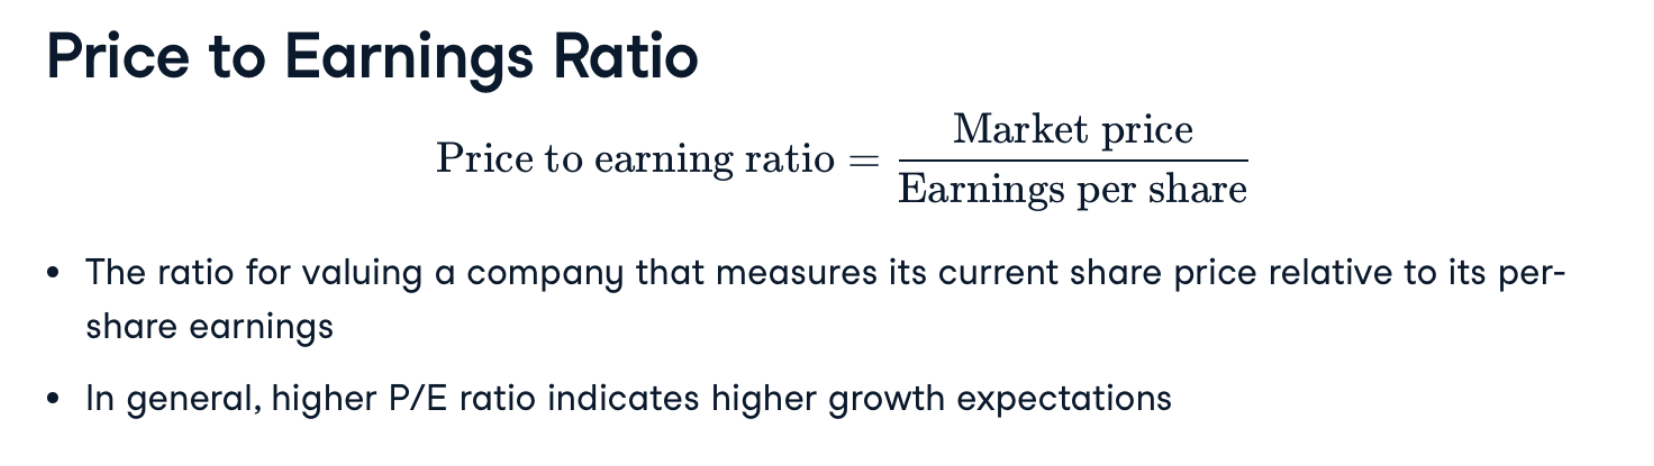

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from google.colab import files

In [3]:

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/projects/S&P100_Data.csv', header=None)  # Use `header=None` if your CSV doesn't have column headers

# Assign names to each row; names, prices, earnings, sectors
row_names = ['names', 'prices', 'earnings', 'sectors']  # Replace with your desired row names
df.index = row_names

# Display the DataFrame
print("DataFrame :", df)

# Save the modified DataFrame back to a CSV (optional)
df.to_csv('/content/drive/MyDrive/projects/S&P100_DataFile.csv', index=True)  # Set `index=True` to include row names in the saved file

files.download('/content/drive/MyDrive/projects/S&P100_DataFile.csv')


                               0               1                       2   \
names                  Apple Inc'    'Abbvie Inc'   'Abbott Laboratories'   
prices                     170.12           93.29                   55.28   
earnings                      9.2            5.31                    2.41   
sectors   Information Technology'   'Health Care'           'Health Care'   

                                 3                4   \
names               'Accenture Plc'   'Allergan Plc'   
prices                        145.3           171.81   
earnings                       5.91            15.42   
sectors    'Information Technology'    'Health Care'   

                                       5                 6               7   \
names      'American International Group'   'Allstate Corp'         'Amgen'   
prices                               59.5             100.5          168.93   
earnings                             2.51              6.79           12.58   
sectors          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The data contains 4 rows with names, prices, earnings, and sector

In [59]:
# Read the new data file with headers
df = pd.read_csv('/content/drive/MyDrive/projects/S&P100_DataFile.csv')

# Access each row and save as arrays
names_array = df.iloc[0].to_numpy()  # Convert first row to NumPy array
prices_array = df.iloc[1].to_numpy()  # Convert second row
earnings_array = df.iloc[2].to_numpy()  # Convert third row
sectors_array = df.iloc[3].to_numpy()  # Convert fourth row

print("Length of names_array:", len(names_array))
print("Length of sectors_array:", len(sectors_array))
print("Length of prices_array:", len(prices_array))
print("Length of earnings_array:", len(earnings_array))

# Data Cleaning
#-------------------------------------------------------------------------------
# Clean the sectors_array to remove unwanted characters and extra spaces
sectors_array = [s.replace("\xa0", "").strip().strip("'") for s in sectors_array]
names_array = [s.replace("\xa0", "").strip().strip("'") for s in names_array]
# Verify the cleaned array
print(sectors_array[:10])  # Print first 10 elements to verify cleaning
print(names_array[:10])
#-------------------------------------------------------------------------------

# Convert prices and earnings to numerical arrays
prices_array_cleaned = np.array(prices_array[1:], dtype=float)  # excluding the name of each row (the first element)
earnings_array_cleaned = np.array(earnings_array[1:], dtype=float)  # excluding the name of each row (the first element)
names_array_cleaned = np.array(names_array[1:])
sectors_array_cleaned = np.array(sectors_array[1:])

print(sectors_array_cleaned)
# Calculate P/E ratio
pe = np.array((prices_array_cleaned)/(earnings_array_cleaned))
print("P/E Ratios:", pe)

print("Length of prices_array_cleaned:", len(prices_array_cleaned))
print("Length of earnings_array_cleaned:", len(earnings_array_cleaned))
print("Length of pe:", len(pe))

Length of names_array: 100
Length of sectors_array: 100
Length of prices_array: 100
Length of earnings_array: 100
['sectors', 'Information Technology', 'Health Care', 'Health Care', 'Information Technology', 'Health Care', 'Financials', 'Financials', 'Health Care', 'Consumer Discretionary']
['names', 'Apple Inc', 'Abbvie Inc', 'Abbott Laboratories', 'Accenture Plc', 'Allergan Plc', 'American International Group', 'Allstate Corp', 'Amgen', 'Amazon.Com Inc.']
['Information Technology' 'Health Care' 'Health Care'
 'Information Technology' 'Health Care' 'Financials' 'Financials'
 'Health Care' 'Consumer Discretionary' 'Financials' 'Industrials'
 'Financials' 'Health Care' 'Financials' 'Financials' 'Health Care'
 'Financials' 'Financials' 'Industrials' 'Health Care'
 'Consumer Discretionary' 'Consumer Staples' 'Consumer Discretionary'
 'Financials' 'Energy' 'Consumer Staples' 'Information Technology'
 'Consumer Staples' 'Energy' 'Health Care' 'Consumer Discretionary'
 'Utilities' 'Materials

Now that we have successfully calculated the price to earnings ratio of all the companies in the S&P 100, let's have a closer look at sector specific trends.

First, we need to filter out the sector specific information. We can achieve this by using **Boolean Arrays**.



1.   Create a boolean filtering array
2.   Apply filtering array to subset another array to select specific elements (subset P/E ratios for specific sectors)

1.   Calculate the average and standard deviation of these P/E ratios


In [78]:
# Create boolean array for the sector "Information Technology"
boolean_array = (sectors_array_cleaned == 'Information Technology')

# Subset sector-specific data
IT_names = names_array_cleaned[boolean_array]
IT_pe = pe[boolean_array]

# Assign numeric IDs to the IT sector companies
IT_id = np.arange(1, len(IT_names) + 1)

# Display results
print("IT Company Names:", IT_names)
print("IT P/E Ratios:", IT_pe)
print("IT Numeric IDs:", IT_id)

IT Company Names: ['Apple Inc' 'Accenture Plc' 'Cisco Systems Inc' 'Facebook Inc'
 'Alphabet Class C' 'Alphabet Class A' 'International Business Machines'
 'Intel Corp' 'Mastercard Inc' 'Microsoft Corp' 'Oracle Corp'
 'Paypal Holdings' 'Qualcomm Inc' 'Texas Instruments' 'Visa Inc']
IT P/E Ratios: [18.49130435 24.58544839 16.76497696 34.51637765 34.09708738 34.6196853
 11.08345534 14.11320755 34.78654292 24.40532544 19.20392157 54.67857143
 17.67989418 24.28325123 31.68678161]
IT Numeric IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Now we create another boolean array to determine which elements in sectors are **Consumer Staples**.

In [83]:
# create boolean array
boolean_array = (sectors_array_cleaned == 'Consumer Staples')

# subset sector_specific data
cs_names = names_array_cleaned[boolean_array]
cs_pe = pe[boolean_array]

# Assign numeric IDs to the CS sector companies
cs_id = np.arange(1, len(cs_names) + 1)

# display sector names
print("CS Company Names:", cs_names)
print("CS P/E Ratios:", cs_pe)
print("CS Numeric IDs:", cs_id)

CS Company Names: ['Colgate-Palmolive Company' 'Costco Wholesale' 'CVS Corp'
 'Kraft Heinz Co' 'Coca-Cola Company' 'Mondelez Intl Cmn A' 'Altria Group'
 'Pepsico Inc' 'Procter & Gamble Company'
 'Philip Morris International Inc' 'Walgreens Boots Alliance']
CS P/E Ratios: [25.14285714 29.41924399 12.29071804 22.63764045 24.12698413 20.72682927
 21.04746835 22.55859375 22.19346734 23.01781737 13.7745098 ]
CS Numeric IDs: [ 1  2  3  4  5  6  7  8  9 10 11]


In this section, we will calculate the mean and standard deviation of P/E ratios for Information Technology and Consumer Staples sectors.


In [84]:
# calculate mean and standard deviation of IT P/E ratios
IT_pe_mean = np.mean(IT_pe)
IT_pe_std = np.std(IT_pe)

print("IT_pe_mean", IT_pe_mean)
print("IT_pe_std", IT_pe_std)

# calculate mean and standard deviation of IT P/E ratios
cs_pe_mean = np.mean(cs_pe)
cs_pe_std = np.std(cs_pe)

print("cs_pe_mean", cs_pe_mean)
print("cs_pe_mean", cs_pe_std)

IT_pe_mean 26.333055420408595
IT_pe_std 10.8661467926753
cs_pe_mean 21.53964814812076
cs_pe_mean 4.605971926609908


Now, we are going to plot the P/E ratios using a scatter plot for each company in these two sectors.

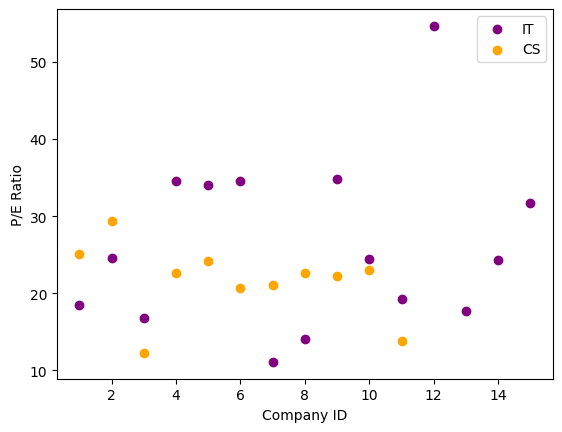

In [102]:
# making the scatter plot
plt.scatter(IT_id, IT_pe, color = 'purple', label = 'IT')
plt.scatter(cs_id, cs_pe, color = 'orange', label = 'CS')
plt.legend()
plt.xlabel('Company ID')
plt.ylabel('P/E Ratio')
plt.show()

**Visualizing Trends**

Let's have a closer look at our scatter plot. Notice that there is a ratio that is much higher than the others. Let's determine the name of the company.

Using histograms can help in looking at the spread of data.
Based on the histogram, we will:


*   Identify the outlier P/E ratio
*   Create a boolean array filter to subset this company


*   Filter out this company information from the provided datasets






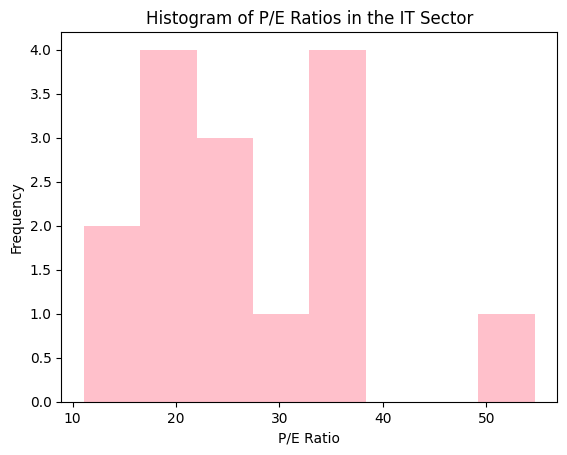

In [99]:
# plot the histogram
plt.hist(x = IT_pe, bins=8, color='pink')
plt.title("Histogram of P/E Ratios in the IT Sector")
plt.xlabel("P/E Ratio")
plt.ylabel("Frequency")
plt.show()

Based on the histogram, the stock with a P/E ratio of > 50 is the outlier. Now let's find the name of the outlier company.

In [97]:
# indentify P/E ratio within IT_pe that is > 50.
outlier_price = IT_pe[IT_pe > 50]
print(outlier_price)

# identifying IT_names that have P/E ratio > 50
outlier_name = IT_names[IT_pe > 50]

# display results
print("In 2017, " + str(outlier_name[0]) + "had an annormally high P/E ratio of " + str(round(outlier_price[0],2)) + ".")

[54.67857143]
In 2017, Paypal Holdingshad an annormally high P/E ratio of 54.68.
